In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [4]:
base_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"
categories = ["yes", "no"]

In [5]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [6]:
df.head()

,image_path,label
0,/kaggle/input/brain-mri-images-for-brain-tumor...,yes
1,/kaggle/input/brain-mri-images-for-brain-tumor...,yes
2,/kaggle/input/brain-mri-images-for-brain-tumor...,yes
3,/kaggle/input/brain-mri-images-for-brain-tumor...,yes
4,/kaggle/input/brain-mri-images-for-brain-tumor...,yes


In [7]:
df.tail()

,image_path,label
248,/kaggle/input/brain-mri-images-for-brain-tumor...,no
249,/kaggle/input/brain-mri-images-for-brain-tumor...,no
250,/kaggle/input/brain-mri-images-for-brain-tumor...,no
251,/kaggle/input/brain-mri-images-for-brain-tumor...,no
252,/kaggle/input/brain-mri-images-for-brain-tumor...,no


In [8]:
df.shape

(253, 2)

In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  253 non-null    object
 1   label       253 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [13]:
df['label']. unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['label'].value_counts()

label
yes    155
no      98
Name: count, dtype: int64

In [15]:
import warnings
warnings.filterwarnings('ignore')

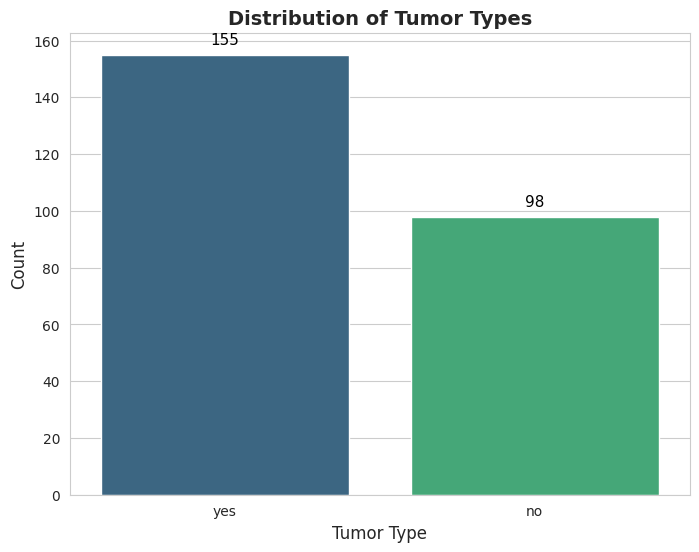

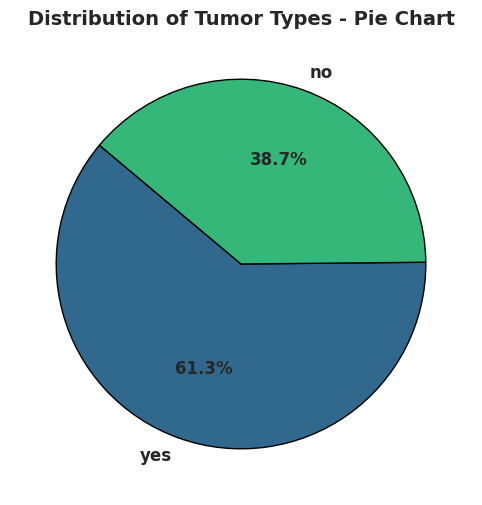

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

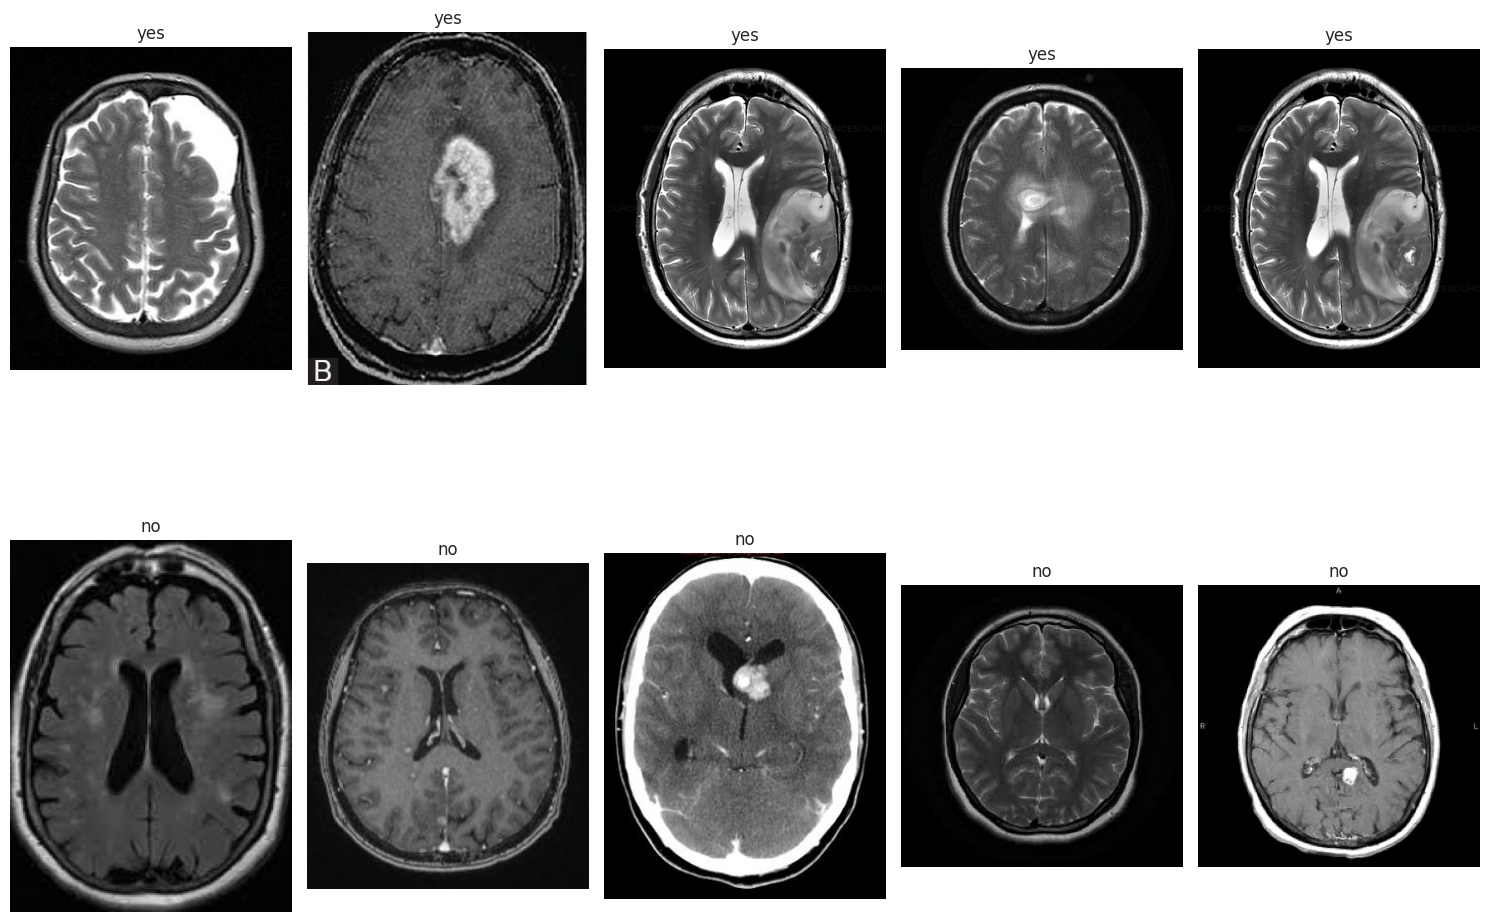

In [17]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])
df = df[['image_path', 'category_encoded']]

In [19]:
import pandas as pd
from sklearn.utils import resample

# Suppose your dataframe is:
# df with columns: 'image_path' and 'category_encoded'

# Separate majority and minority classes
df_majority = df[df['category_encoded'] == df['category_encoded'].value_counts().idxmax()]
df_minority = df[df['category_encoded'] == df['category_encoded'].value_counts().idxmin()]

# Upsample the minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,                      # Sample with replacement
    n_samples=len(df_majority),         # Match majority class
    random_state=42
)

# Combine majority class with upsampled minority class
df_resampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class distribution
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    155
1    155
Name: count, dtype: int64


In [20]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/brain-mri-images-for-brain-tumor...,0
1,/kaggle/input/brain-mri-images-for-brain-tumor...,1
2,/kaggle/input/brain-mri-images-for-brain-tumor...,1
3,/kaggle/input/brain-mri-images-for-brain-tumor...,1
4,/kaggle/input/brain-mri-images-for-brain-tumor...,1
...,...,...
305,/kaggle/input/brain-mri-images-for-brain-tumor...,0
306,/kaggle/input/brain-mri-images-for-brain-tumor...,1
307,/kaggle/input/brain-mri-images-for-brain-tumor...,1
308,/kaggle/input/brain-mri-images-for-brain-tumor...,0


In [21]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

In [26]:
batch_size = 16
img_size = (150, 150)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

In [27]:
train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 248 validated image filenames belonging to 2 classes.
Found 31 validated image filenames belonging to 2 classes.
Found 31 validated image filenames belonging to 2 classes.


In [28]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout, BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, Adam

In [29]:


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,193 (13.73 MB)

 Trainable params: 3,600,193 (13.73 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [32]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=20,  
    verbose=1
)

Epoch 1/20


I0000 00:00:1745657087.826190      90 service.cc:148] XLA service 0x7bd7c4007b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745657087.827378      90 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745657087.827397      90 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745657088.221768      90 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/16 ━━━━━━━━━━━━━━━━━━━━ 1:51 7s/step - accuracy: 0.4375 - loss: 0.6989

I0000 00:00:1745657091.902201      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 332ms/step - accuracy: 0.5143 - loss: 0.6870 - val_accuracy: 0.8710 - val_loss: 0.5173
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6488 - loss: 0.6721 - val_accuracy: 0.6129 - val_loss: 0.6295
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7497 - loss: 0.5467 - val_accuracy: 0.8710 - val_loss: 0.5331
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7331 - loss: 0.5289 - val_accuracy: 0.8710 - val_loss: 0.4106
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8050 - loss: 0.4099 - val_accuracy: 0.8387 - val_loss: 0.4336
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8895 - loss: 0.2969 - val_accuracy: 0.8710 - val_loss: 0.3765
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8701 - loss: 0.2738 - val_accuracy: 0.9032 - val_loss: 0.2741
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9142 - loss: 0.2377 - val_accuracy: 0.9032 - val_loss: 

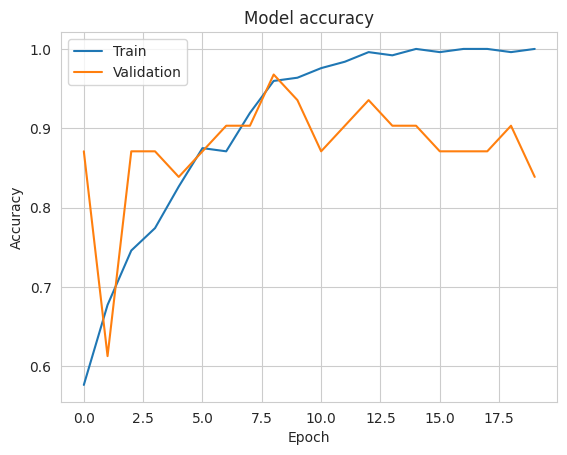

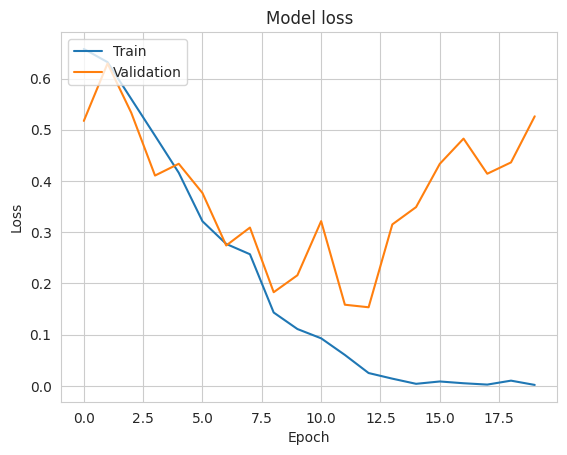

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step


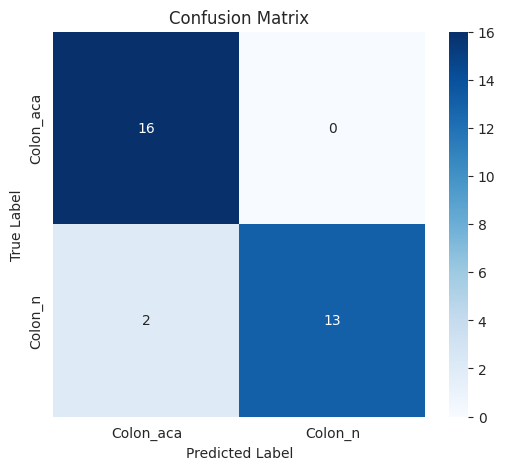

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.87      0.93        15

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



In [35]:
y_true = test_gen_new.classes  
y_pred = model.predict(test_gen_new)
y_pred_classes = np.round(y_pred).astype(int)  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_aca', 'Colon_n'], yticklabels=['Colon_aca', 'Colon_n'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))

In [36]:
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,837,441 (18.45 MB)

 Trainable params: 4,837,057 (18.45 MB)

 Non-trainable params: 384 (1.50 KB)

In [38]:
model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [40]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=20,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.5585 - loss: 4.0895 - val_accuracy: 0.6452 - val_loss: 0.5911
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6035 - loss: 5.6622 - val_accuracy: 0.6452 - val_loss: 0.6506
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6315 - loss: 3.1333 - val_accuracy: 0.6452 - val_loss: 0.6695
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6684 - loss: 3.7523 - val_accuracy: 0.7742 - val_loss: 0.4743
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6184 - loss: 2.7394 - val_accuracy: 0.7419 - val_loss: 0.6654
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6993 - loss: 2.1883 - val_accuracy: 0.7097 - val_loss: 0.5195
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6409 - loss: 1.6013 - val_accuracy: 0.4839 - val_loss: 2.5334
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6234 - loss: 1.1803 - val_accuracy: 0.4839 -

In [46]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [52]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=30,  
    verbose=1
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9197 - loss: 0.2470 - val_accuracy: 0.9032 - val_loss: 0.2493
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9020 - loss: 0.2446 - val_accuracy: 0.9032 - val_loss: 0.2565
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8893 - loss: 0.2692 - val_accuracy: 0.9032 - val_loss: 0.2467
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9196 - loss: 0.2437 - val_accuracy: 0.9032 - val_loss: 0.2471
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9093 - loss: 0.2354 - val_accuracy: 0.9032 - val_loss: 0.2513
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8952 - loss: 0.2402 - val_accuracy: 0.9032 - val_loss: 0.2466
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9387 - loss: 0.2414 - val_accuracy: 0.9032 - val_loss: 0.2426
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9127 - loss: 0.2229 - val_accuracy: 0.9032 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


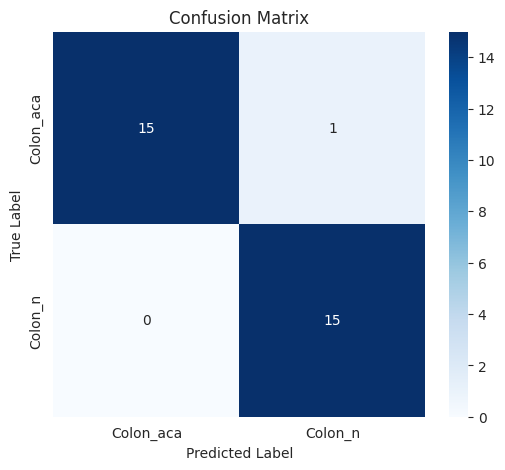

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      1.00      0.97        15

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31



In [53]:
y_true = test_gen_new.classes  
y_pred = model.predict(test_gen_new)
y_pred_classes = np.round(y_pred).astype(int)  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_aca', 'Colon_n'], yticklabels=['Colon_aca', 'Colon_n'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))

In [57]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,188,737 (77.01 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [58]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=30,  
    verbose=1
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.5144 - loss: 0.7760 - val_accuracy: 0.5806 - val_loss: 0.6964
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.4987 - loss: 0.7758 - val_accuracy: 0.5161 - val_loss: 0.6944
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5358 - loss: 0.7423 - val_accuracy: 0.5161 - val_loss: 0.6845
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5238 - loss: 0.7727 - val_accuracy: 0.5161 - val_loss: 0.6782
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5809 - loss: 0.7220 - val_accuracy: 0.6774 - val_loss: 0.6585
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5318 - loss: 0.6774 - val_accuracy: 0.7742 - val_loss: 0.6470
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4485 - loss: 0.7596 - val_accuracy: 0.8065 - val_loss: 0.6366
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5680 - loss: 0.6833 - val_accuracy: 0.7742 - 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


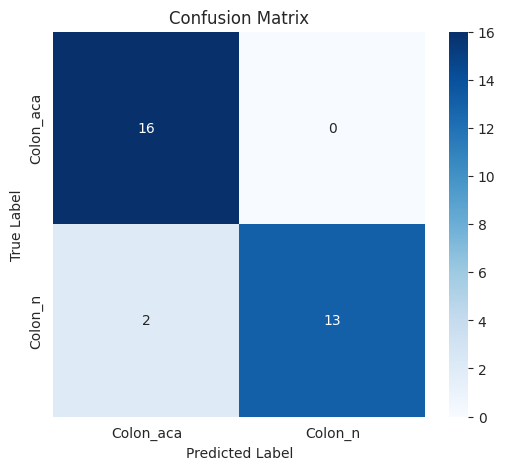

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.87      0.93        15

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



In [59]:
y_true = test_gen_new.classes  
y_pred = model.predict(test_gen_new)
y_pred_classes = np.round(y_pred).astype(int)  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_aca', 'Colon_n'], yticklabels=['Colon_aca', 'Colon_n'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))